In [8]:
from seagul.rl.run_utils import load_model
import pandas as pd
import os
import numpy as np
from seagul.plot import smooth_bounded_curve

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efe2f25aa20>)

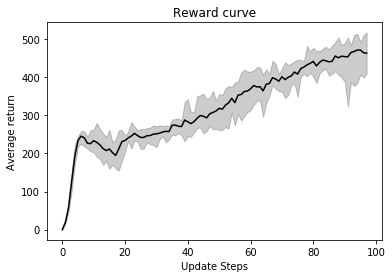

In [11]:
model_list = []
df_list = []
min_length = float('inf')
trial_path = "/home/sgillen/work/lorenz/run_bs/data/"

for entry in os.scandir(trial_path):
    df = pd.read_csv(entry.path + "/progress.csv")
    
    if len(df['eprewmean']) < min_length:
        min_length = len(df['eprewmean'])

    df_list.append(df)
    #model_list.append(load_model(entry.path))

min_length = int(min_length)
rewards = np.zeros((min_length, len(df_list)))

for i, df in enumerate(df_list):
   rewards[:, i] = np.array(df['eprewmean'][:min_length])

smooth_bounded_curve(rewards[:min_length],window=10)



In [3]:
model